In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne


In [2]:
fname = 'data/train/Data_S02_Sess01.csv'

In [3]:
df = pd.read_csv(fname)
df.head()

,Time,Fp1,Fp2,AF7,AF3,AF4,AF8,F7,F5,F3,...,P4,P6,P8,PO7,POz,P08,O1,O2,EOG,FeedBackEvent
0,0.000,509.630351,609.688545,522.032153,454.102593,309.486489,524.804335,484.333383,587.340998,469.651564,...,295.834834,485.530586,411.161892,448.726097,99.151239,613.529369,428.286969,378.933590,-906.668876,0
1,0.005,864.521388,1038.483761,917.023604,775.970207,576.123392,934.962455,833.427809,996.070640,823.715523,...,528.713692,894.541770,735.827300,780.487458,239.407648,1067.349342,782.319229,711.286079,-1484.107119,0
2,0.010,754.576625,904.117869,803.235608,678.039830,489.573235,803.064230,706.392172,868.996293,717.565698,...,459.066586,870.217213,691.971456,689.656321,255.876323,933.617965,679.366071,699.014004,-1313.435186,0
3,0.015,801.593761,957.870867,834.026569,716.254450,519.006819,860.058239,769.518284,921.777695,756.664761,...,487.899954,905.564172,723.595463,723.944898,247.990115,992.180045,713.405603,714.734949,-1391.966973,0
4,0.020,769.054899,920.060832,811.596932,692.750986,494.315305,817.206918,727.500302,892.004312,729.239924,...,464.032652,769.258159,642.962959,687.852792,179.835749,949.832471,680.906506,607.057329,-1347.494166,0


In [4]:
eeg_columns = list(df.columns)
print(eeg_columns)


['Time', 'Fp1', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'POz', 'P08', 'O1', 'O2', 'EOG', 'FeedBackEvent']


In [5]:
channels = []
for col in eeg_columns:
    if col != 'Time' and col != 'FeedBackEvent' and col != 'EOG':
        channels.append(col)

print(channels)
print(len(channels))




['Fp1', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'POz', 'P08', 'O1', 'O2']
56


Creating RawArray with float64 data, n_channels=56, n_times=132001
    Range : 0 ... 132000 =      0.000 ...   220.000 secs
Ready.


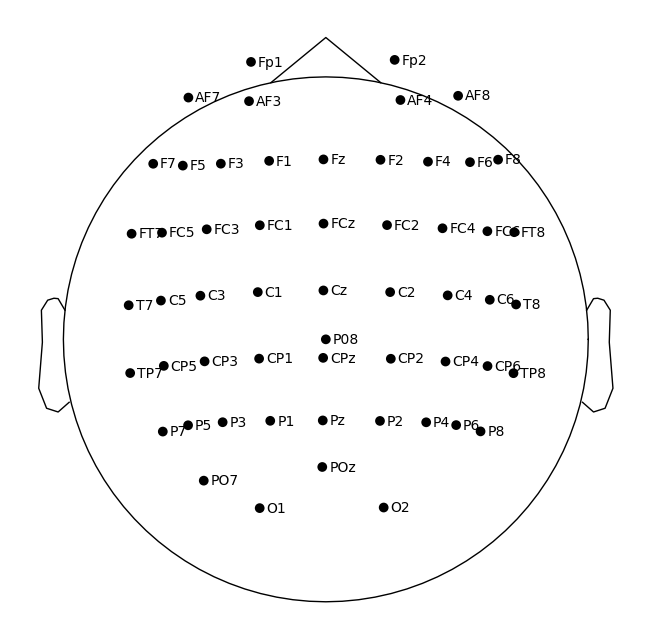

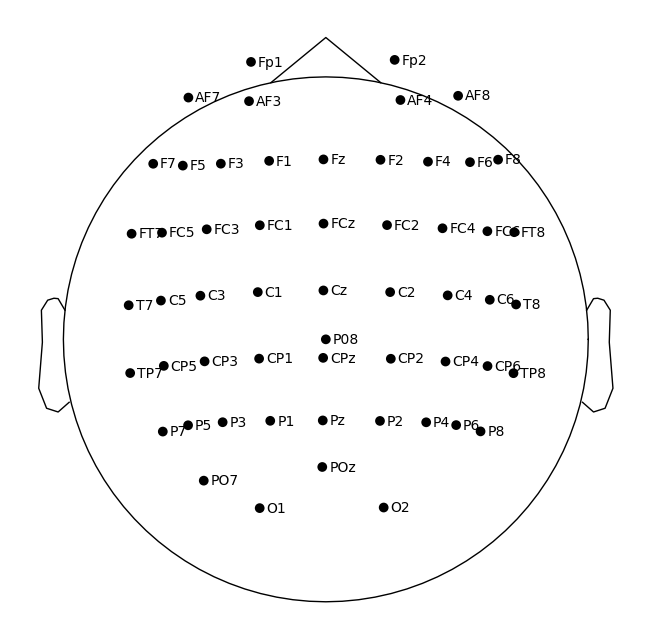

In [6]:
data = df[channels].values.T # Transpose the data matrix so that each row is a channel and each column is a time point
sampling_rate = 600 # Hz

info = mne.create_info(ch_names=channels, sfreq=sampling_rate, ch_types='eeg')
raw = mne.io.RawArray(data, info)

#montage = mne.channels.make_standard_montage('standard_1020')
#raw.set_montage(montage)


rename_channel_dict = {}

# Rename only the first 56 channels (your EEG channels)
for ix, ch in enumerate(raw.ch_names):
    if ix >= 56:
        break
    rename_channel_dict[ch] = ch.replace("EEG_", "")  # simpler & safer

# Apply the rename
raw.rename_channels(rename_channel_dict)

# Apply the standard 10–20 montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, match_case=False, on_missing='ignore')

raw.plot_sensors(kind = 'topomap', ch_type = 'eeg', show_names = True)


In [7]:
ch_names = np.array(raw.ch_names)
ch_ix = len(ch_names) - 1 # max valid index
ch_names_ix_dict = {ch_names[i]: i for i in range(len(ch_names))}
ch_ix

55

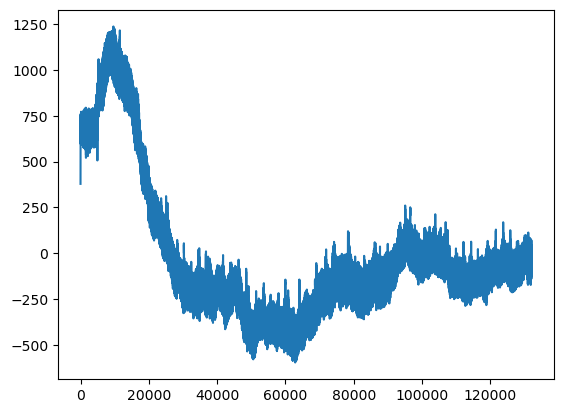

In [8]:
sensor_data = raw.get_data()

plt.plot(sensor_data[ch_ix, : ])

In [9]:

#Find the onsets (0 → 1 or 0 → 0 transitions)

#Use the value at that onset (0 = non-target, 1 = target)

feedbackevents = df['FeedBackEvent'].values # feedbackevents is the col 'feedbackevents' turned into an array using .values method

onset_index = [] # the index num where feedbackevents[num] == 1, or in other words the index where the stimulus is triggered

for index, num in enumerate(feedbackevents):
    if num == 1:
        onset_index.append(index)

print(onset_index)

assert 0 not in feedbackevents[onset_ix]



[9599, 11172, 12755, 14332, 15905, 18389, 19966, 21542, 23119, 24699, 27792, 29926, 32063, 34199, 36333, 39423, 41556, 43689, 45823, 47956, 51043, 53176, 55320, 57456, 59593, 62130, 63707, 65283, 66863, 68440, 71530, 73670, 75810, 77944, 80080, 82614, 84187, 85761, 87334, 88907, 91431, 93004, 94577, 96151, 97724, 100244, 101818, 103391, 104964, 106538, 109588, 111725, 113865, 116008, 118145, 121241, 123375, 125512, 127648, 129785]


NameError: name 'onset_ix' is not defined